This is a machine learning data analysis on liver disease data found on Kaggle. The data was very clean to start but I wanted to show what I would do to clean data and convert categorical features to continuous. 


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Exploratory Data Analysis

In [24]:
data = pd.read_csv('../indian_liver_patient.csv')

In [25]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [27]:
data.groupby('Dataset').mean()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,
1,46.153846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.914179
2,41.239521,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.029576


dataset 1 is a patient with liver disease, 2 with not 

Albumin and Globulin is the only column with missing data. Because we only have 4 missing rows and the difference is fairly small between the two datasets, I am going to fill in the missing values with the total average

Bilirubin and the Aminotransferases seem to be strong factors

In [28]:
data.groupby(data.Albumin_and_Globulin_Ratio.isnull()).mean()
#looking at the missing data

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Albumin_and_Globulin_Ratio,,,,,,,,,,
False,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
True,39.500000,0.900000,0.325000,176.250000,21.000000,37.000000,6.700000,3.625000,NaN,1.500000


There may significance in the missing data but because its only four values we will still take the average 

In [29]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Lets change Gender to a continuous variable

Male: 0
Female: 1

In [30]:
gender_num = {'Male': 0, 'Female':1}
data.Gender = data.Gender.map(gender_num)

Overlaid histograms

Age may not be the best indicator

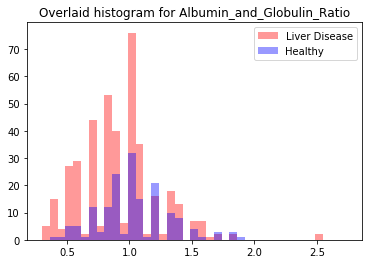

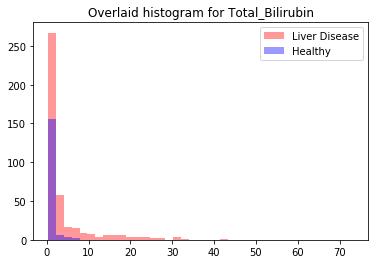

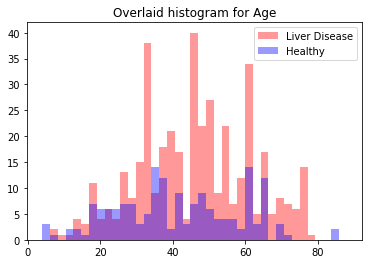

In [31]:
for i in ['Albumin_and_Globulin_Ratio', 'Total_Bilirubin','Age']:
    sick = list(data[data['Dataset'] == 1][i].dropna()) # non missing values
    healthy = list(data[data['Dataset'] == 2][i].dropna())
    xmin = min(min(sick), min(healthy))
    xmax = max(max(sick), max(healthy))
    width = (xmax - xmin) / 40
    sns.distplot(sick, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(healthy, color='b', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Liver Disease', 'Healthy'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

Fill missing values for Albumin and Globulin Ratio

In [32]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(), inplace = True)

In [35]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [37]:
#writing clean data
data.to_csv('../liver_clean.csv', index = False)

In [38]:
clean = pd.read_csv('../liver_clean.csv')
clean.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Spliting Data into training, validation and test

Split will be 60% training, 20% validation, 20% test

In [39]:
from sklearn.model_selection import train_test_split

In [55]:
features = clean.drop('Dataset', axis = 1)
labels = clean.Dataset


train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.4, random_state=1)
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5, random_state=1)


In [56]:
#checking sizes
for i in [train_labels, val_labels, test_labels]:
    print(len(i) / len(labels))

0.5986277873070326
0.2006861063464837
0.2006861063464837


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

First Cross validation model without tuning hyper parameters:

In [63]:
rf = RandomForestClassifier()
score = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5) #cv is number of folds

In [64]:
print(score)

[0.73239437 0.77464789 0.75362319 0.68115942 0.66666667]


Range of 67% to 77% accuracy. Tuning the hyperparameters with grid search might enable us to reach the higher side

In [65]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameters = {'n_estimators': [5, 50, 100], 'max_depth': [2, 10, 20, None]}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 50, 100], 'max_depth': [2, 10, 20, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


C:\Users\mattl\ANACONDA1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [69]:
print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 100}

0.696 (+/-0.02) for {'max_depth': 2, 'n_estimators': 5}
0.719 (+/-0.017) for {'max_depth': 2, 'n_estimators': 50}
0.722 (+/-0.029) for {'max_depth': 2, 'n_estimators': 100}
0.679 (+/-0.07) for {'max_depth': 10, 'n_estimators': 5}
0.693 (+/-0.086) for {'max_depth': 10, 'n_estimators': 50}
0.693 (+/-0.078) for {'max_depth': 10, 'n_estimators': 100}
0.679 (+/-0.098) for {'max_depth': 20, 'n_estimators': 5}
0.711 (+/-0.084) for {'max_depth': 20, 'n_estimators': 50}
0.699 (+/-0.093) for {'max_depth': 20, 'n_estimators': 100}
0.645 (+/-0.063) for {'max_depth': None, 'n_estimators': 5}
0.691 (+/-0.102) for {'max_depth': None, 'n_estimators': 50}
0.688 (+/-0.084) for {'max_depth': None, 'n_estimators': 100}


Top 3 are : ('max_depth': 2, 'n_estimators': 100), ('max_depth': 2, 'n_estimators': 50) 
and ('max_depth': 20, 'n_estimators': 50)

We will test these three on the validation set


In [74]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=2)
rf1.fit(train_features, train_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=2)
rf2.fit(train_features, train_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=50, max_depth=20)
rf3.fit(train_features, train_labels.values.ravel())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy, Precision and Recall

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 2 / # OF EST: 100 -- A: 0.709 / P: 0.711 / R: 0.988
MAX DEPTH: 2 / # OF EST: 50 -- A: 0.692 / P: 0.698 / R: 0.988
MAX DEPTH: 20 / # OF EST: 50 -- A: 0.658 / P: 0.728 / R: 0.817


Max depth of 2 and 100 estimators seem to be the best hyperparameters

To finish, we will test these hyperparamters on the test set

In [78]:
y_pred = rf1.predict(test_features)
accuracy = round(accuracy_score(test_labels,y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth, rf2.n_estimators, accuracy, precision, recall))

MAX DEPTH: 2 / # OF EST: 50 -- A: 0.761 / P: 0.757 / R: 1.0


These parameters preformed quite well on the test set